# Loan Prediction

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('C:/Users/calca/Downloads/train_ctrUa4K.csv') 

In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
train['Sum_Income']=train['ApplicantIncome'] + train ['CoapplicantIncome']
train['Mean_Income']=train['LoanAmount']/train['Loan_Amount_Term']
train['Balance Income'] = train['Sum_Income']-(train['Mean_Income']*1000)

In [4]:
cont=['Mean_Income','Sum_Income','Balance Income','LoanAmount']

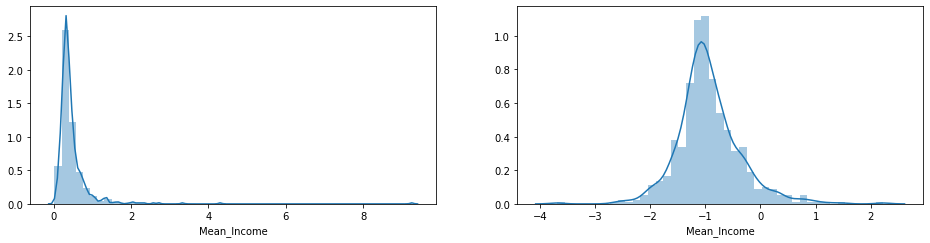

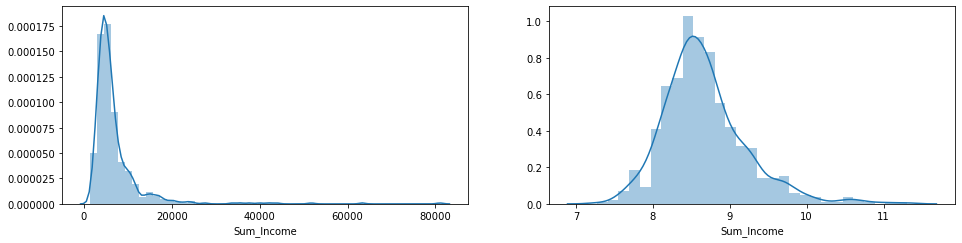

C:\Users\calca\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


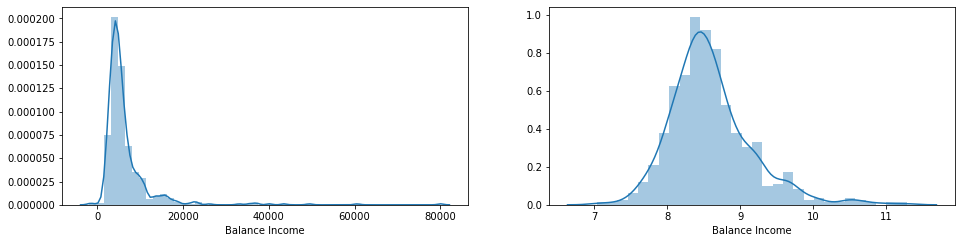

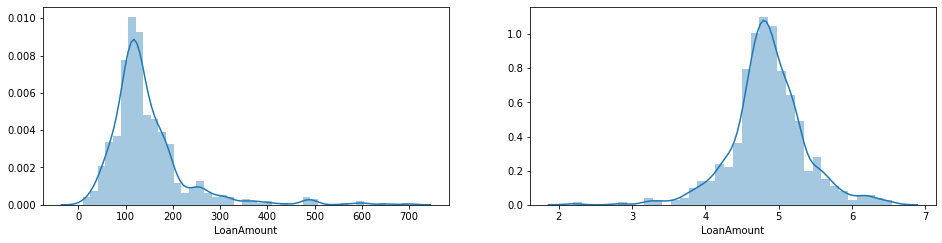

In [139]:
for i in cont:
    plt.figure(figsize=(16, 8))
    plt.subplot(2, 2, 1)
    sns.distplot(train[i])
    plt.subplot(2, 2, 2)
    sns.distplot(np.log(train[i]))
    plt.show()

In [85]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Sum_Income            0
Mean_Income          36
Balance Income       36
dtype: int64

In [5]:
train['Credit_History'] = train['Credit_History'].astype(str)

In [6]:
train['Gender'].fillna(train['Gender'].mode()[0][:],inplace=True)
train['Married'].fillna(train['Married'].mode()[0][:],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0][:],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0][:],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)
train['Mean_Income'].fillna(train['Mean_Income'].median(),inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[:],inplace=True)
train['Balance Income'].fillna(train['Balance Income'].median(),inplace=True)


In [7]:
train.drop('Loan_ID',axis=1, inplace=True)

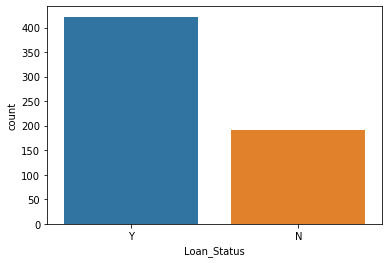

In [8]:
sns.countplot(train['Loan_Status'])

In [90]:
train_cat = train.select_dtypes(include='object')
train_int = train.select_dtypes(include=['int64','float64'])

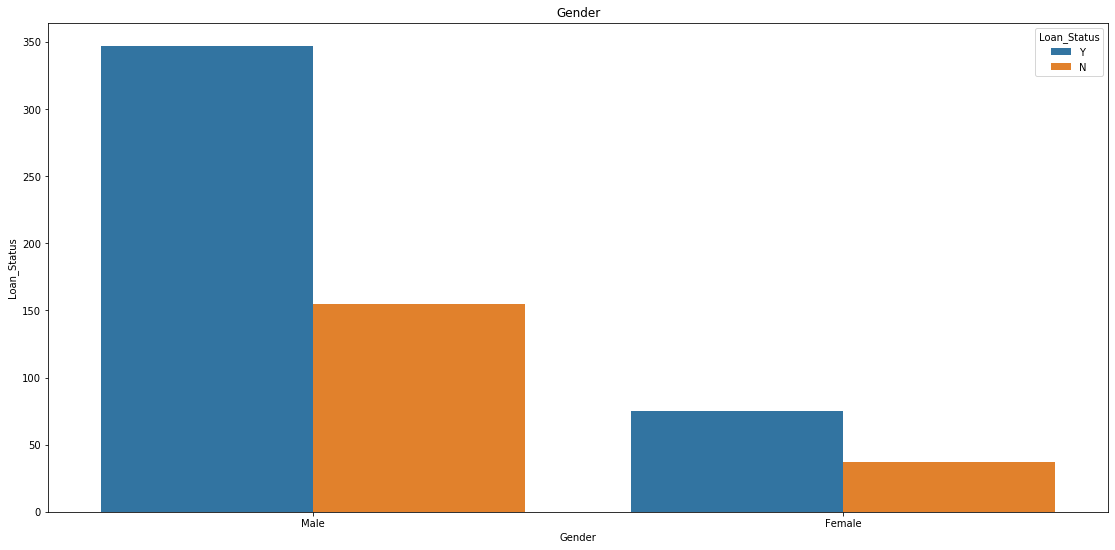

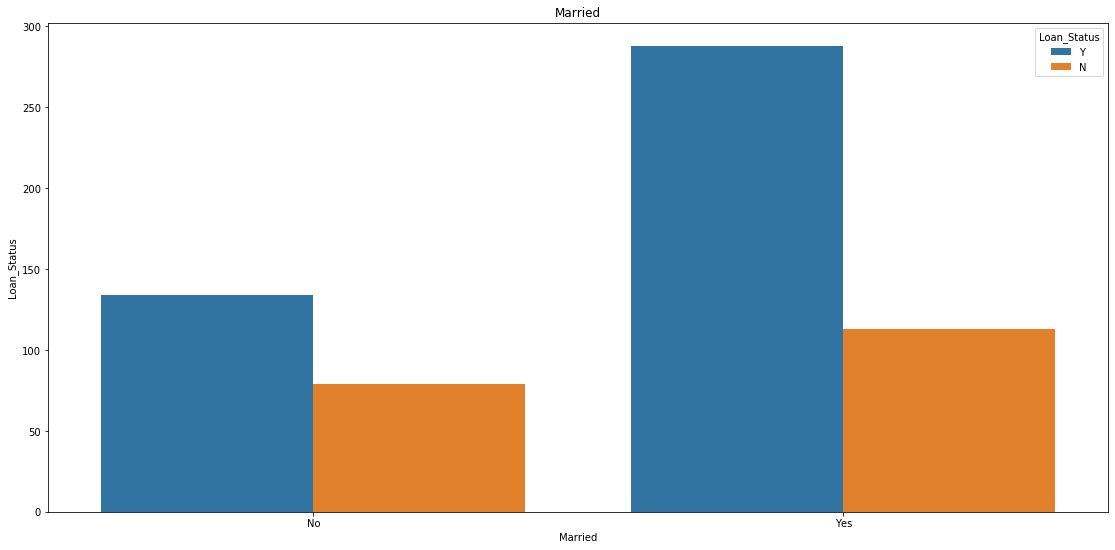

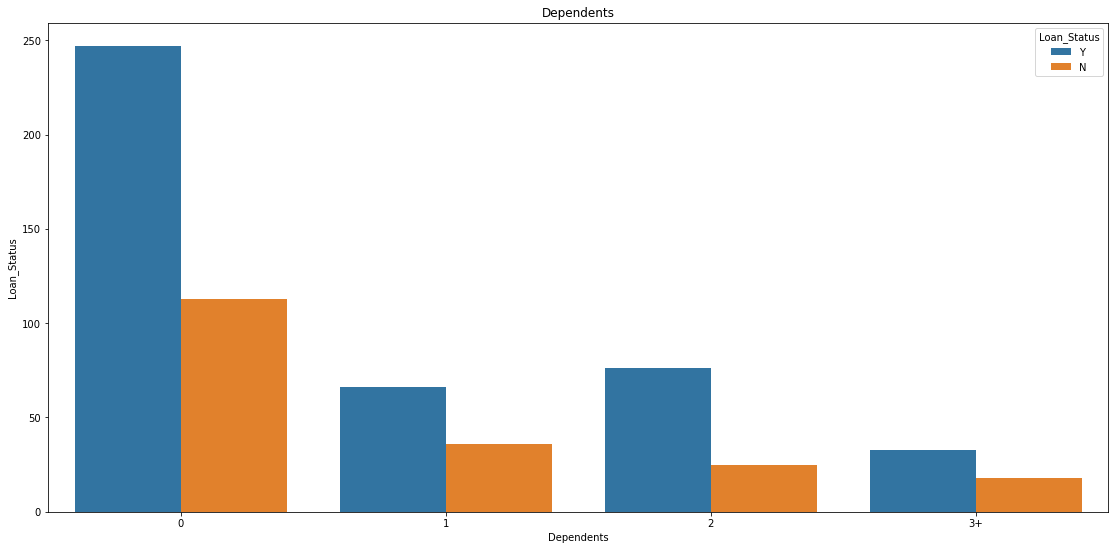

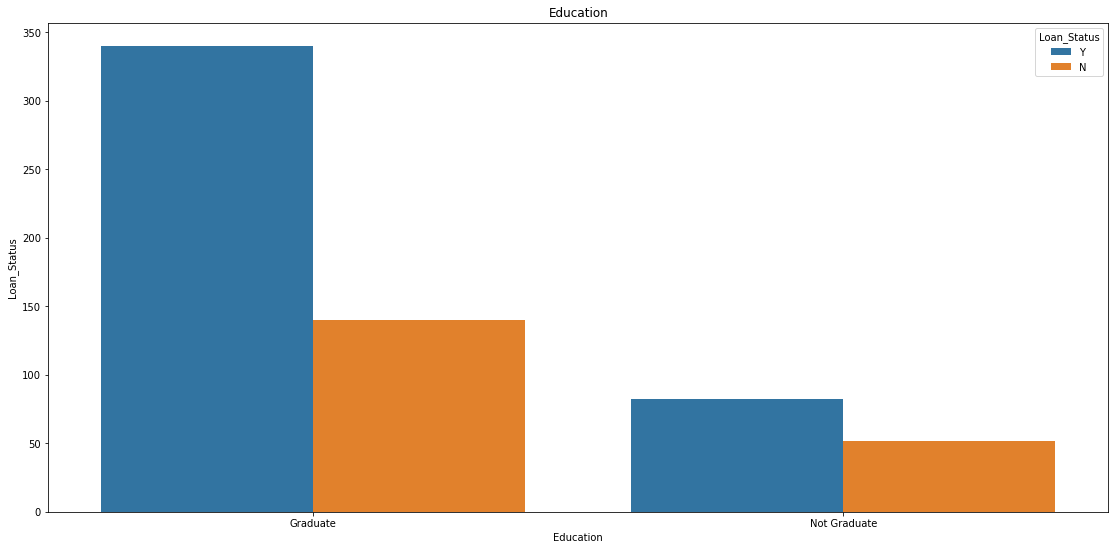

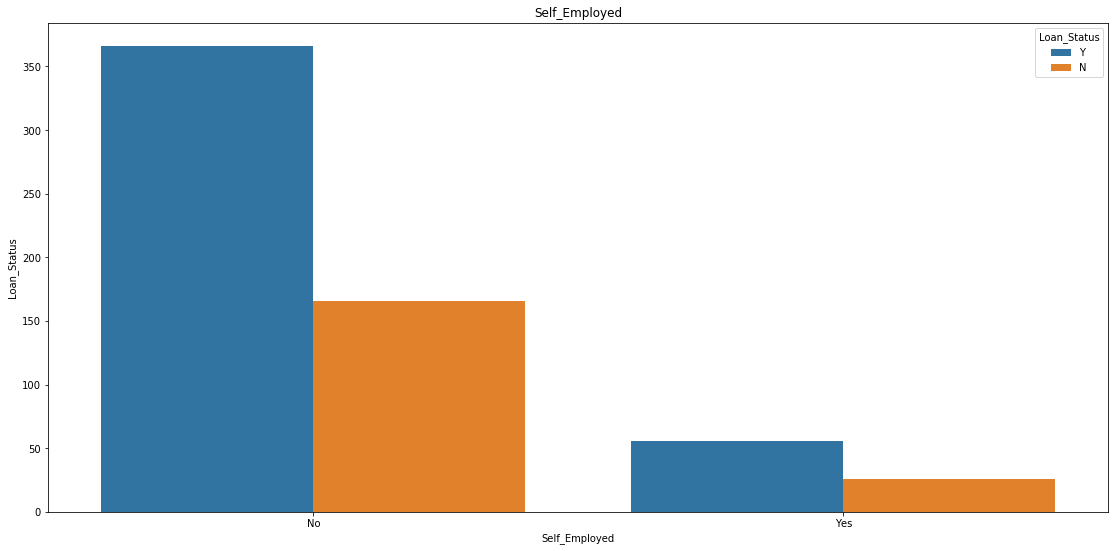

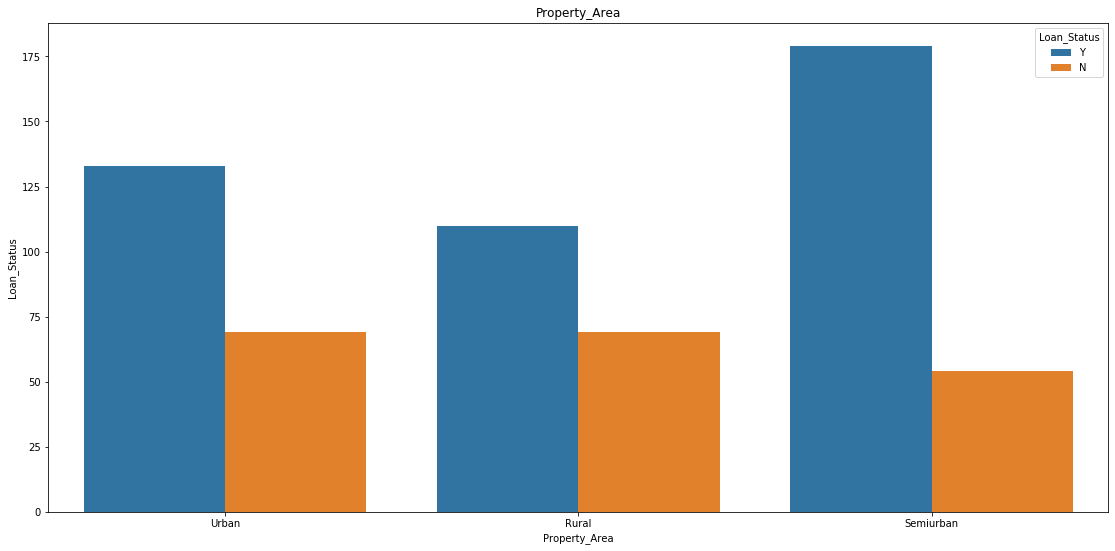

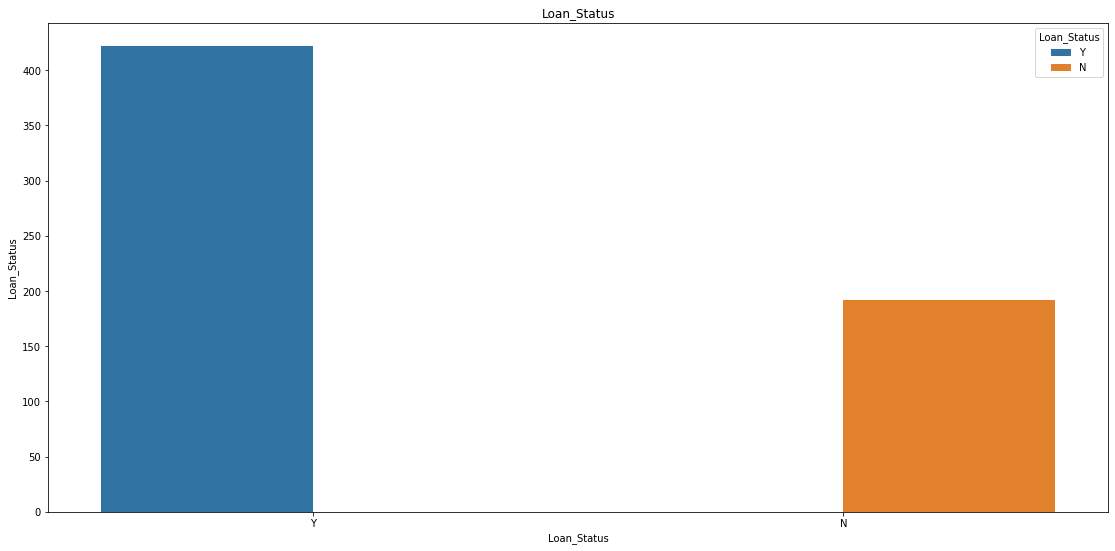

In [91]:
for feature in train_cat:
    plt.figure(figsize = (19,9))
    sns.countplot(train_cat[feature],hue=train['Loan_Status'])
    plt.title(feature)
    plt.ylabel('Loan_Status')
    plt.show()

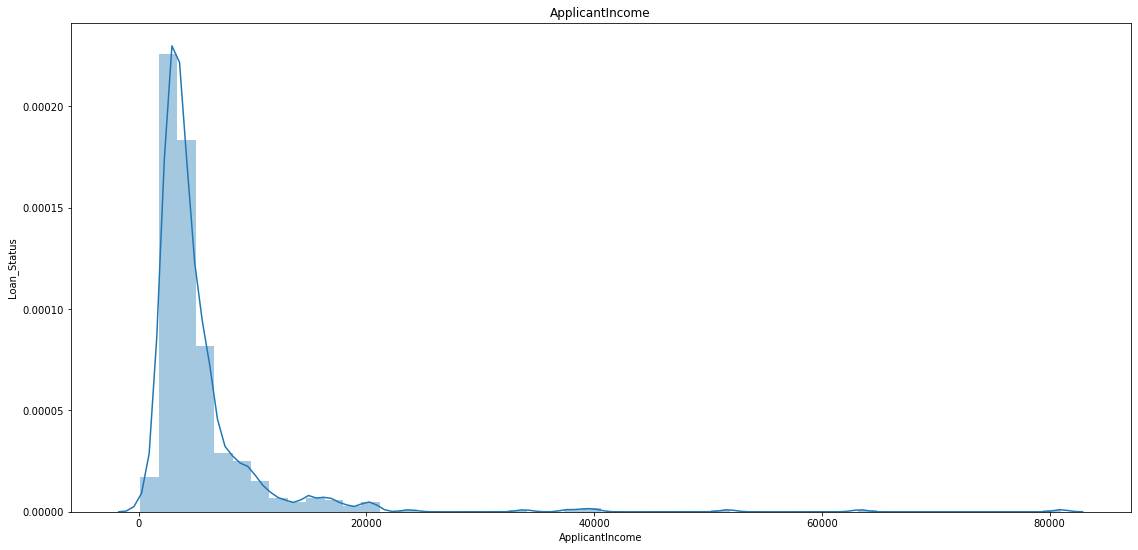

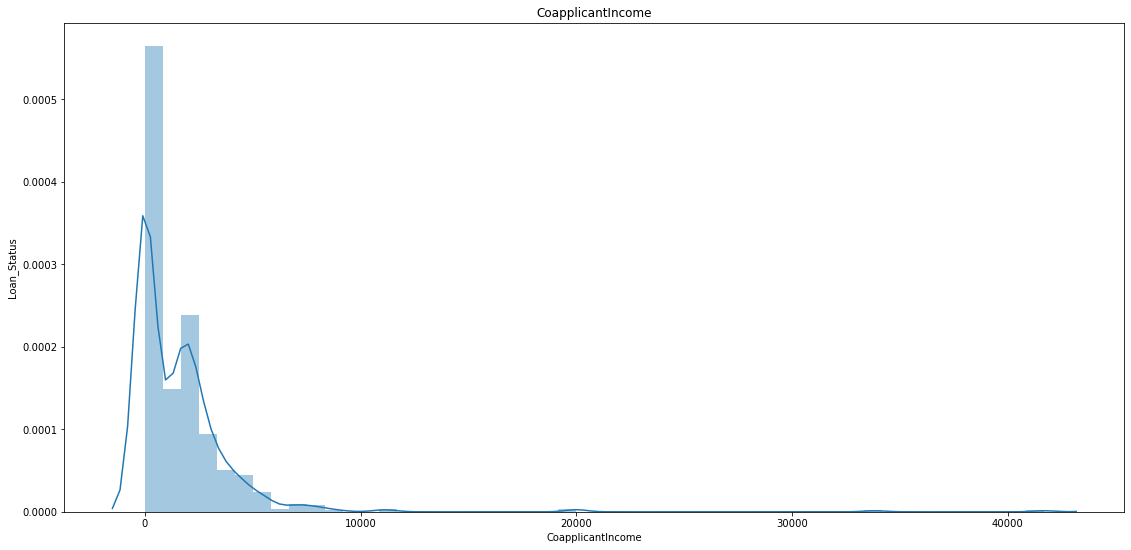

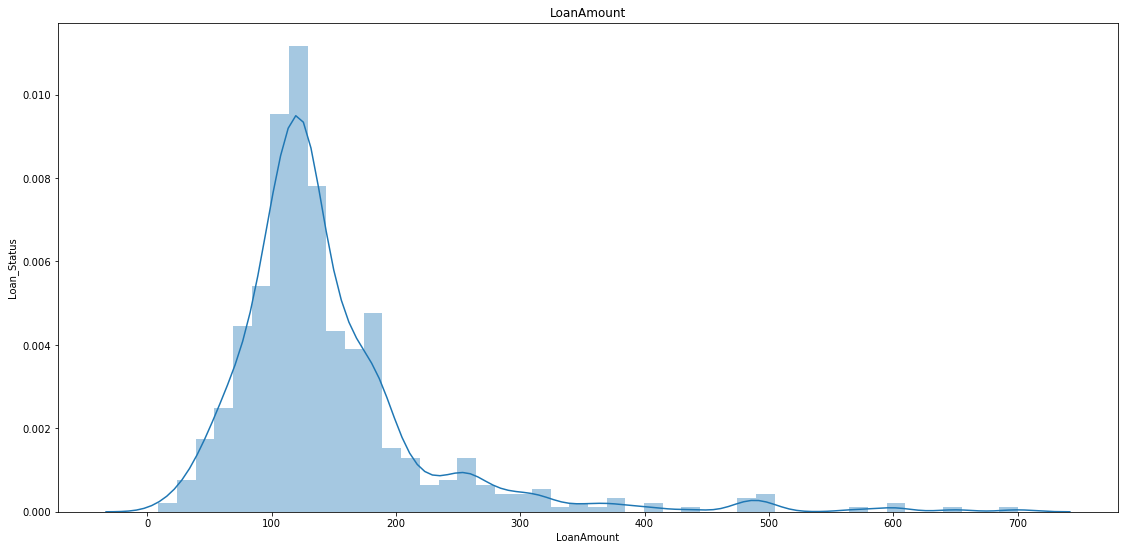

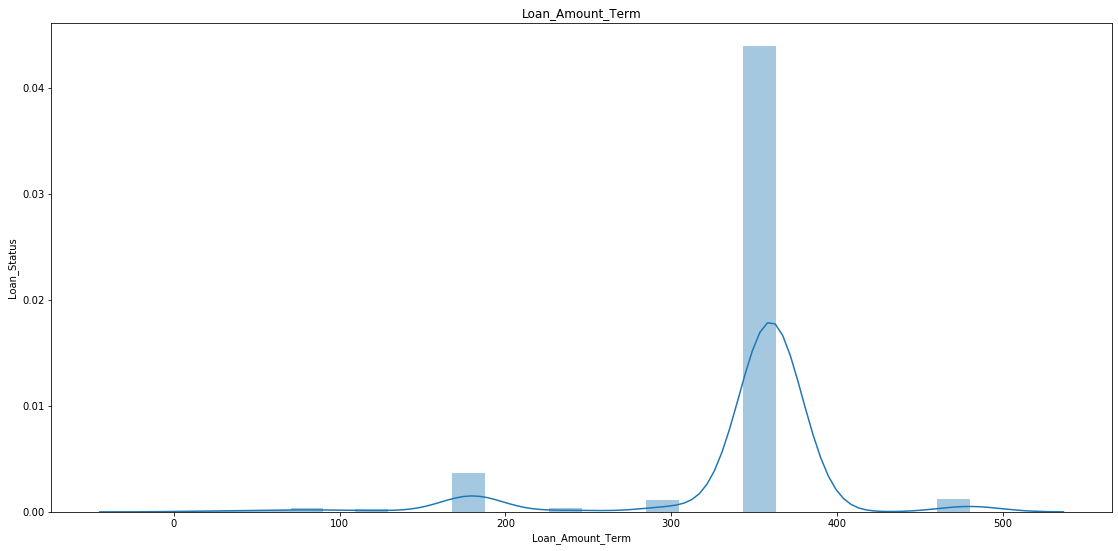

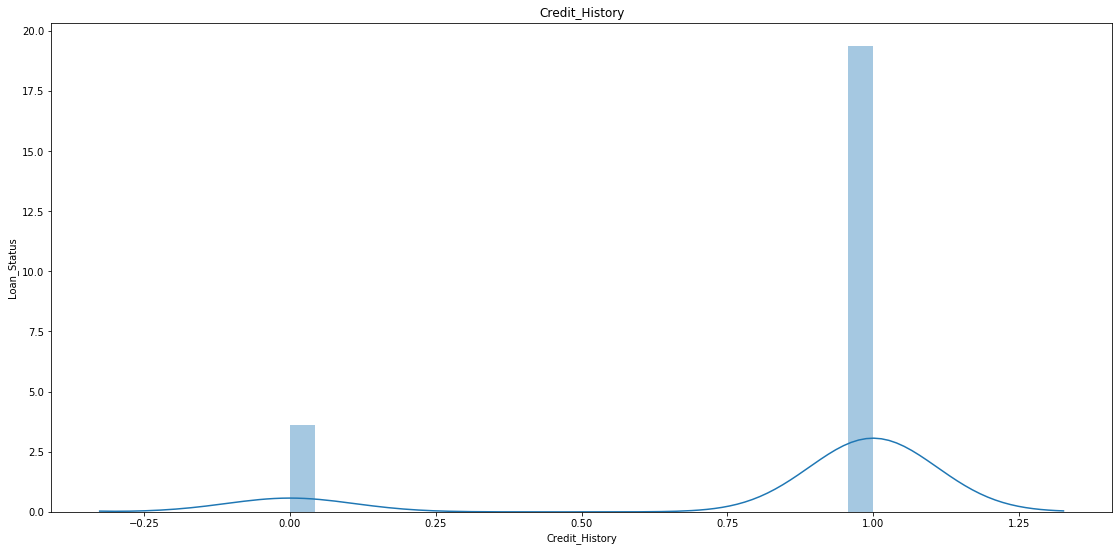

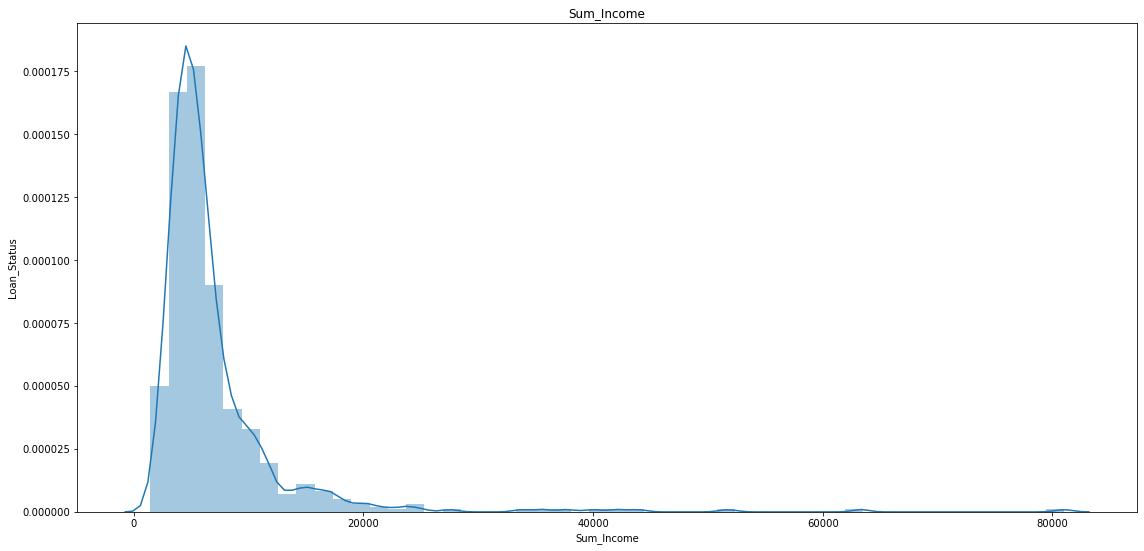

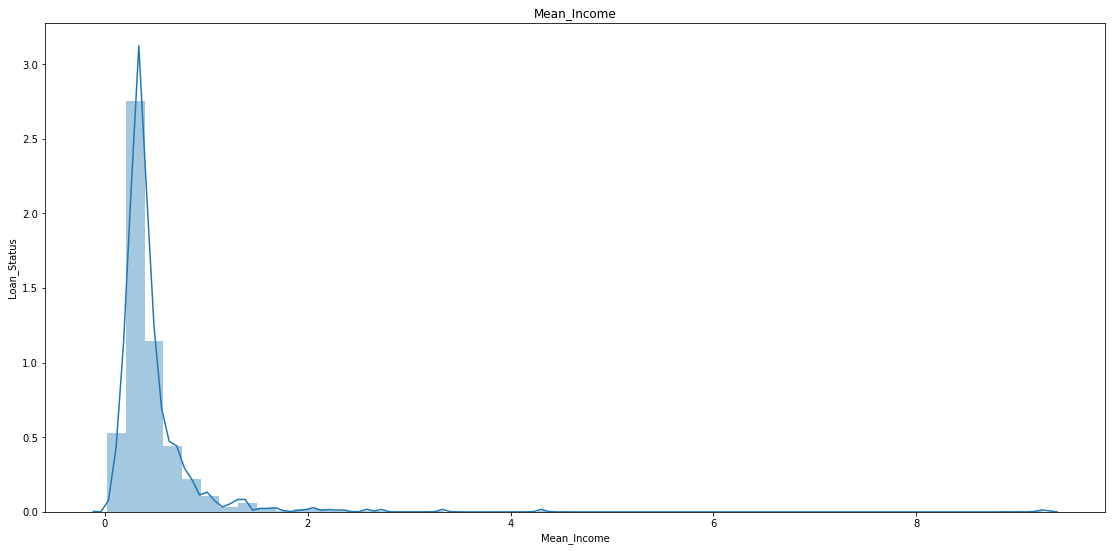

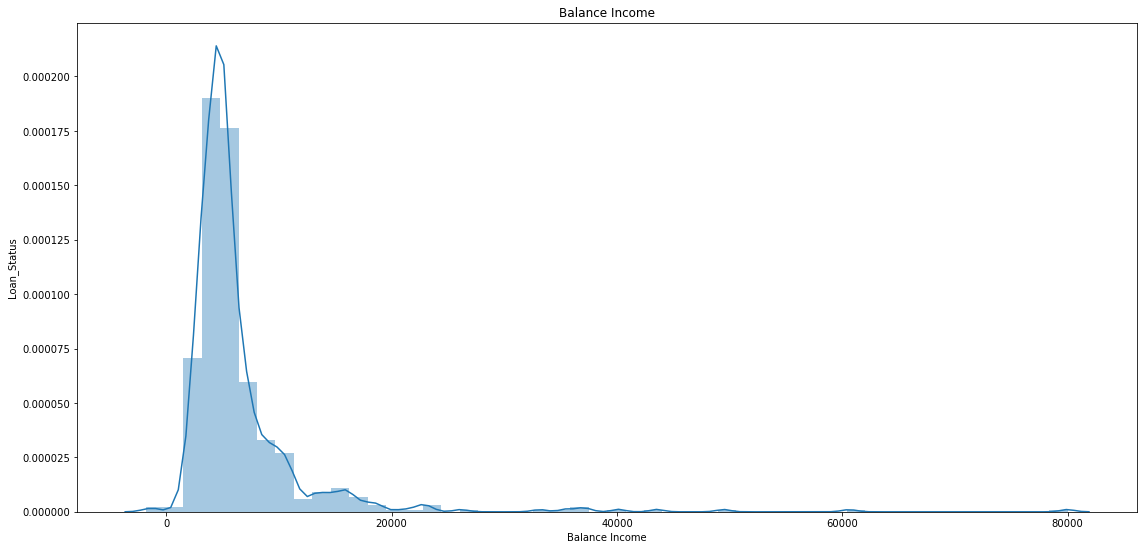

In [92]:
for feature in train_int:
    plt.figure(figsize = (19,9))
    sns.distplot(train_int[feature])
    plt.title(feature)
    plt.ylabel('Loan_Status')
    plt.show()

In [9]:
train['Gender']=train['Gender'].map({'Male':0,'Female':1})
train['Married']=train['Married'].map({'No':0,'Yes':1})
train['Education']=train['Education'].map({'Graduate':1,'Not Graduate':0})
train['Self_Employed']=train['Self_Employed'].map({'Yes':1,'No':0})
train['Property_Area']=train['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':0})
train['Loan_Status']=train['Loan_Status'].map({'Y':1,'N':0})
train['Dependents']=train['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [96]:
corr = train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Sum_Income,Mean_Income,Balance Income
Gender,1.000000,-0.364569,-0.172914,0.045364,0.000525,-0.058809,-0.082912,-0.106904,0.074030,-0.013472,0.025752,-0.017987,-0.093191,-0.058494,-0.086207
Married,-0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.006082,0.004257,0.091478,0.083319,0.090962,0.069201
Dependents,-0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.038702,-0.000244,0.010118,0.125590,0.101861,0.131169
Education,0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.168759,0.073928,0.081822,0.065243,0.085884,0.161362,0.079399,0.150275
Self_Employed,0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.002362,-0.030860,-0.003700,0.113000,0.054733,0.112191
ApplicantIncome,-0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.014715,-0.009500,-0.004710,0.893037,0.320701,0.880496
CoapplicantIncome,-0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,-0.002056,0.010522,-0.059187,0.342781,0.136003,0.343042
LoanAmount,-0.106904,0.146546,0.163103,0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.007543,-0.046632,-0.033214,0.620316,0.490840,0.602494
Loan_Amount_Term,0.074030,-0.100912,-0.103864,0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.003735,-0.076120,-0.022549,-0.070917,-0.493624,-0.033294
Credit_History,-0.013472,0.006082,-0.038702,0.081822,-0.002362,-0.014715,-0.002056,-0.007543,-0.003735,1.000000,-0.001969,0.561678,-0.015109,-0.003446,-0.020258


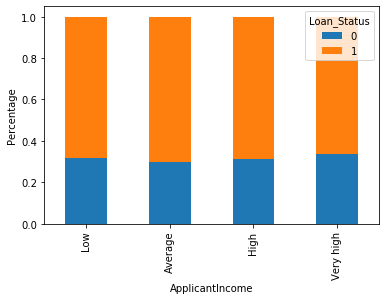

In [97]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

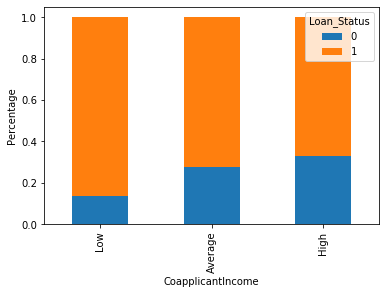

In [98]:

bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

In [10]:
train=pd.get_dummies(train)

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [12]:
x=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']

In [13]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=100)
# x = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

In [16]:
X_train.shape,y_train.shape

((460, 16), (460,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [17]:
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)

In [18]:
X_train_partition, X_val, y_train_partition, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

In [19]:

parameters = {
    "eta": [0.1, 0.5, 0.8, 0.02],
    "max_depth": [2, 4, 8, 7, 10],
    "gamma": [0, 1, 10, 100, 50],
    "min_child_weight": [5, 8, 10, 14, 20],
    "subsample": [0.4, 0.85, 0.65],
    "colsample_bytree": [0.3, 0.5, 0.7],
    #"sampling_method":["uniform","gradient_based"],
    "reg_alpha": [0.2, 0.6, 0.8],
    "n_estimators": [100, 500, 1000],
    "learning_rate": [0.002, 0.02],
}

In [270]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedKFold, KFold

# cv = RepeatedKFold(n_splits=10, random_state=1)
# # clf = GridSearchCV(GradientBoostingRegressor(), parameters, cv=10, n_jobs=-1)

# # clf.fit(X_train, y_train)
# # #print(clf.score(X_train, y_train))
# ## print(clf.best_params_)

# grid_search = RandomizedSearchCV(XGBClassifier(tree_method='gpu_hist',use_label_encoder=False,eval_metric='error'),
#                                  parameters,
#                                  cv=cv,
#                                  return_train_score=True)
# grid_search.fit(X_train, y_train)

# grid_search.best_params_

In [19]:
model = XGBClassifier(objective='binary:logistic',
                     missing=1,
                     seed=58,
                     learning_rate=0.002,
                     max_depth=8,
                     min_child_weight=8,
                     gamma=10,
                     subsample=0.65,
                     colsample_bytree=0.5,
                     reg_alpha=0.8,
                     #reg_lambda=2,
                     eta=0.08,
                     n_estimators=1000)

In [20]:
model.fit(X_train_partition,
          y_train_partition,
          early_stopping_rounds=10,
         eval_metric='error',
          eval_set=[(X_train_partition, y_train_partition), (X_val, y_val)],
          verbose=True)

C:\Users\calca\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.22222	validation_1-error:0.26087
[1]	validation_0-error:0.29227	validation_1-error:0.36956
[2]	validation_0-error:0.29227	validation_1-error:0.36956
[3]	validation_0-error:0.29227	validation_1-error:0.36956
[4]	validation_0-error:0.29227	validation_1-error:0.36956
[5]	validation_0-error:0.17391	validation_1-error:0.21739
[6]	validation_0-error:0.29227	validation_1-error:0.36956
[7]	validation_0-error:0.17391	validation_1-error:0.21739
[8]	validation_0-error:0.17391	validation_1-error:0.21739
[9]	validation_0-error:0.17391	validation_1-error:0.21739
[10]	validation_0-error:0.17391	validation_1-error:0.21739
[11]	validation_0-error:0.17391	validation_1-error:0.21739
[12]	validation_0-error:0.17391	validation_1-error:0.21739
[13]	validation_0-error:0.17391	validation_1-error:0.21739
[14]	validation_0-error:0.17391	validation_1-error:0.21739
[15]	validation_0-error:0.17391	validation_1-error:0.21739


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.08, gamma=10,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.002, max_delta_step=0, max_depth=8,
              min_child_weight=8, missing=1, monotone_constraints='()',
              n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=58,
              reg_alpha=0.8, reg_lambda=1, scale_pos_weight=1, seed=58,
              subsample=0.65, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [21]:
predictions = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

print("Test Accuracy: ",accuracy_score(y_test,predictions))
print("Test F1 Score: ",f1_score(y_test,predictions))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.7727272727272727
Test F1 Score:  0.8484848484848484
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,33,54
1,2,98,100
All,23,131,154


In [23]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

print('\n accuracy:', accuracy_score(y_test, predictions))

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154

Confusion matrix:
[[21 33]
 [ 2 98]]

 accuracy: 0.7727272727272727


In [24]:
predict_reg = GradientBoostingClassifier()

In [25]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# scaler = sc.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [26]:
predict_reg.fit(X_train, y_train)

GradientBoostingClassifier()

In [266]:
predictions = (predict_reg.predict_proba(X_test)[:,1] >= 0.6718854343289771).astype(bool) 

In [27]:
predictions = predict_reg.predict(X_test)

In [321]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, RepeatedKFold, KFold


param_test1 = {'n_estimators':[50,100,50,100,150],
               'min_samples_split':[10,100,50],
               'min_samples_leaf':[10,50,100],
               'max_depth':[100,8,6],
               'subsample':[0.1,0.4,0.8],
               'learning_rate':[0.1,0.01,0.001],
           "ccp_alpha":[0.0,0.1,0.01]
               
              }
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(random_state=10),
                        param_grid= param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
             n_jobs=4,
             param_grid={'ccp_alpha': [0.0, 0.1, 0.01],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [100, 8, 6],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 100, 50],
                         'n_estimators': [50, 100, 50, 100, 150],
                         'subsample': [0.1, 0.4, 0.8]},
             scoring='roc_auc')

In [325]:
gsearch1.best_estimator_

GradientBoostingClassifier(max_depth=100, min_samples_leaf=10,
                           min_samples_split=10, n_estimators=150,
                           random_state=10, subsample=0.8)

In [30]:
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score


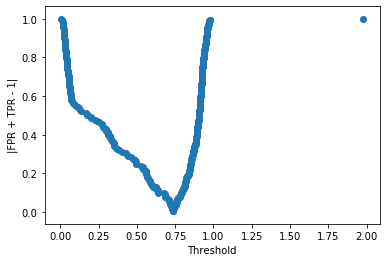

0.7350594127521447

In [31]:
fpr, tpr, thresholds = roc_curve(y_train,predict_reg.predict_proba(X_train)[:,1],drop_intermediate=False)
plt.scatter(thresholds,np.abs(fpr+tpr-1))
plt.xlabel("Threshold")
plt.ylabel("|FPR + TPR - 1|")
plt.show()

thresholds[np.argmin(np.abs(fpr+tpr-1))]


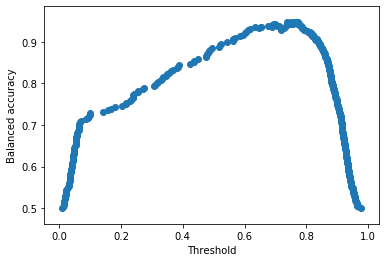

0.7386041795149705

In [285]:
threshold = []
accuracy = []

for p in np.unique(predict_reg.predict_proba(X_train)[:,1]):
  threshold.append(p)
  y_pred = (predict_reg.predict_proba(X_train)[:,1] >= p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred))
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()

threshold[np.argmax(accuracy)]
# 0.5602892029098923

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

print('\n accuracy:', accuracy_score(y_test, predictions))

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.44      0.57        54
           1       0.76      0.94      0.84       100

    accuracy                           0.77       154
   macro avg       0.78      0.69      0.71       154
weighted avg       0.77      0.77      0.75       154

Confusion matrix:
[[24 30]
 [ 6 94]]

 accuracy: 0.7662337662337663


In [268]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression



predict_reg_log = LogisticRegression()
predict_reg_log.fit(X_train, y_train)
predictions = predict_reg_log.predict(X_test)


print('Classification report:')
print(classification_report(y_test, predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, predictions)
print(cm)

print('\n accuracy:', accuracy_score(y_test, predictions))

Classification report:
              precision    recall  f1-score   support

           0       0.60      0.59      0.60        54
           1       0.78      0.79      0.79       100

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154

Confusion matrix:
[[32 22]
 [21 79]]

 accuracy: 0.7207792207792207


C:\Users\calca\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [261]:
test = pd.read_csv('C:/Users/calca/Downloads/test_lAUu6dG.csv')

In [258]:
test.drop('Loan_ID',axis=1, inplace=True)
test['Gender']=test['Gender'].map({'Male':0,'Female':1})
test['Married']=test['Married'].map({'No':0,'Yes':1})
test['Education']=test['Education'].map({'Graduate':1,'Not Graduate':0})
test['Self_Employed']=test['Self_Employed'].map({'Yes':1,'No':0})
test['Property_Area']=test['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':0})
test['Dependents']=test['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
test['sum']=test['ApplicantIncome'] + test ['CoapplicantIncome']
test['mean']=test['LoanAmount']/test['Loan_Amount_Term']
test['Balance Income'] = test['sum']-(test['mean']*1000)

#test=pd.get_dummies(test)
#test.dropna(inplace=True)

In [259]:
from sklearn.impute import KNNImputer
#imputer = KNNImputer(n_neighbors=5)
test = pd.DataFrame(imputer.transform(test),columns = test.columns)

In [260]:
test_pred = predict_reg.predict(test)

In [262]:
test_sub = pd.DataFrame({'Loan_ID': test['Loan_ID'],'Loan_Status':test_pred})

In [263]:
test_sub['Loan_Status']=test_sub['Loan_Status'].map({0:'N',1:'Y'})


In [264]:
test_sub.to_csv('loan_pred_4.csv',index=0)